In [1]:
from sdrl import SatelliteReader
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 打印当前支持的传感器
print("支持的传感器：", SatelliteReader.support_sensing())

支持的传感器： ('CB04_MUX', 'CB04_WFI', 'GF1_PMS', 'GF1_WFV', 'GF2', 'GF4', 'GF6_PMS', 'GF6_WFV', 'Landsat8_OLI', 'Sentinel2A', 'Sentinel2B', 'SPOT1-4', 'SPOT5', 'SPOT6-7', 'ElectronicMap')


In [3]:
# 构造GF1 WFV数据的读取器
gf1_wfv_reader = SatelliteReader(sensing="GF1_WFV")
print("GF1 WFV 波段信息如下：")
gf1_wfv_reader.summay()

GF1 WFV 波段信息如下：
   tag  order  resolution    wavelength description
0  多光谱      1          16  [0.45, 0.52]        Blue
1  多光谱      2          16  [0.52, 0.59]       Green
2  多光谱      3          16  [0.63, 0.69]         Red
3  多光谱      4          16  [0.77, 0.89]         NIR


In [4]:
# 打开图像
gf1_wfv_reader.open("testdata/GF1_WFV2_E109.5_N32.6_20200425_L1A0004761605.tiff")

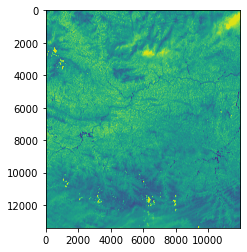

In [5]:
# 加载近红外波段进行显示
nir = gf1_wfv_reader.get_band("NIR", "description")
plt.imshow(nir)
plt.show()

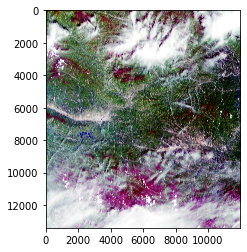

In [6]:
# 加载RGB图像进行显示
rgb = gf1_wfv_reader.get_RGB(to_u8=True)
plt.imshow(rgb)
plt.show()

In [7]:
# 打印当前支持的波段计算
print("支持的波段计算：", SatelliteReader.support_index())

支持的波段计算： ('NDVI', 'EVI', 'RVI', 'GNDVI', 'DVI', 'NDWI', 'GCVI')


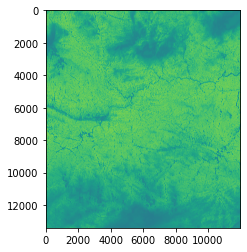

In [8]:
# 计算NDVI进行显示
ndvi = gf1_wfv_reader.sample_band_compute("NDVI")
plt.imshow(ndvi)
plt.show()

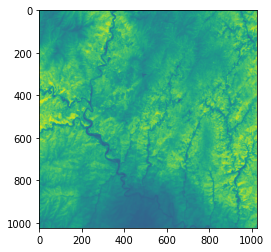

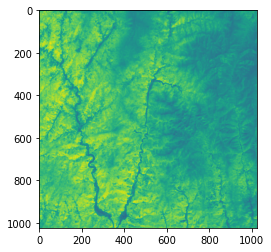

In [9]:
# 迭代块显示GCVI
for i, ima in enumerate(gf1_wfv_reader.get_iter(block_size=(1024, 1024), mode="GCVI")):
    if i == 2:
        break
    plt.imshow(ima)
    plt.show()